In [23]:
import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
train=pd.read_csv('datasets/train.csv').drop(['Unnamed: 0'],axis=1)
fuzz=pd.read_csv('datasets/Fuzz_table.csv').drop(['Unnamed: 0'],axis=1)
lev=pd.DataFrame(np.load('Features/lev.npy'))

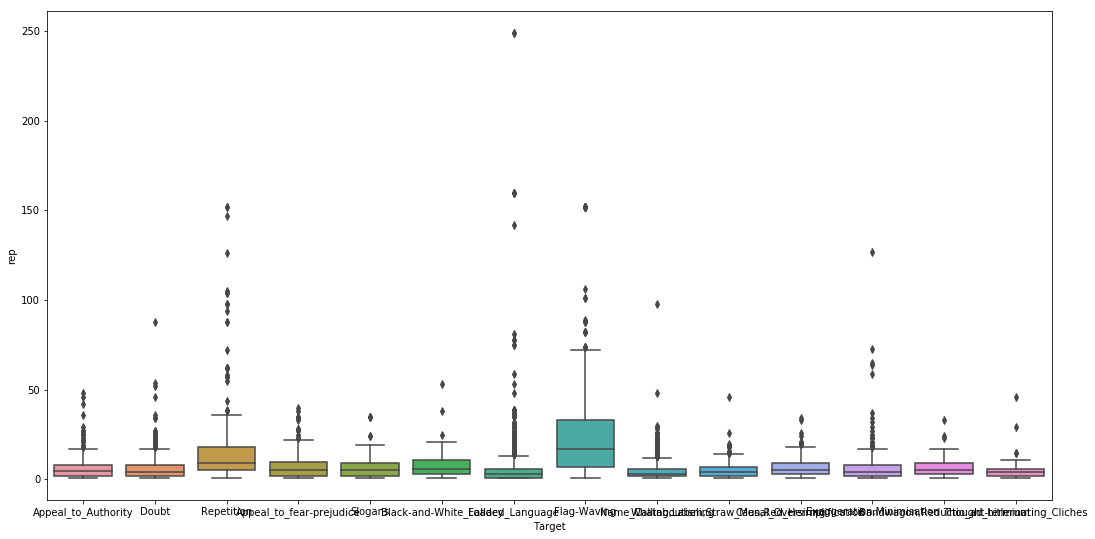

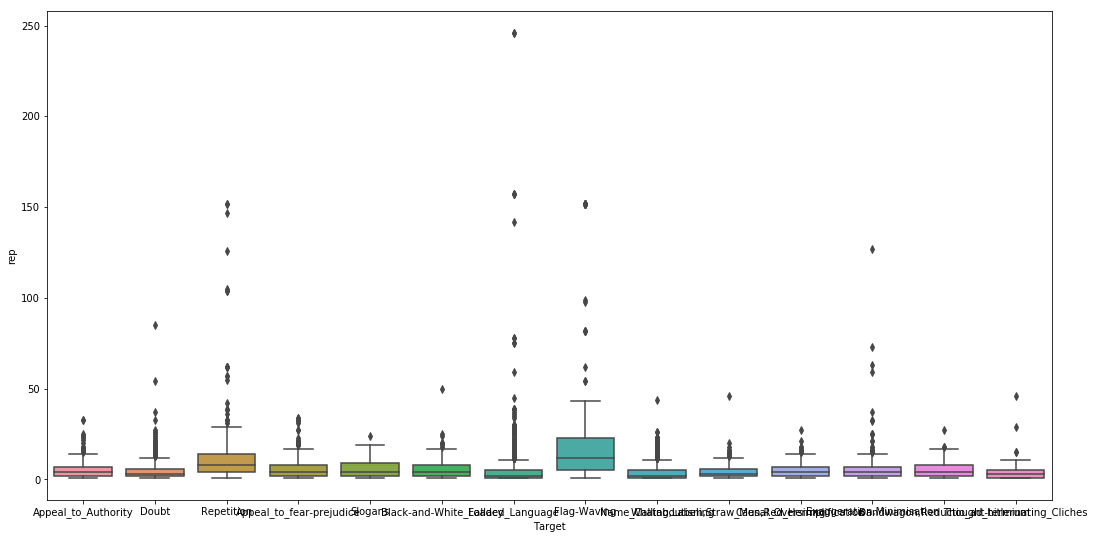

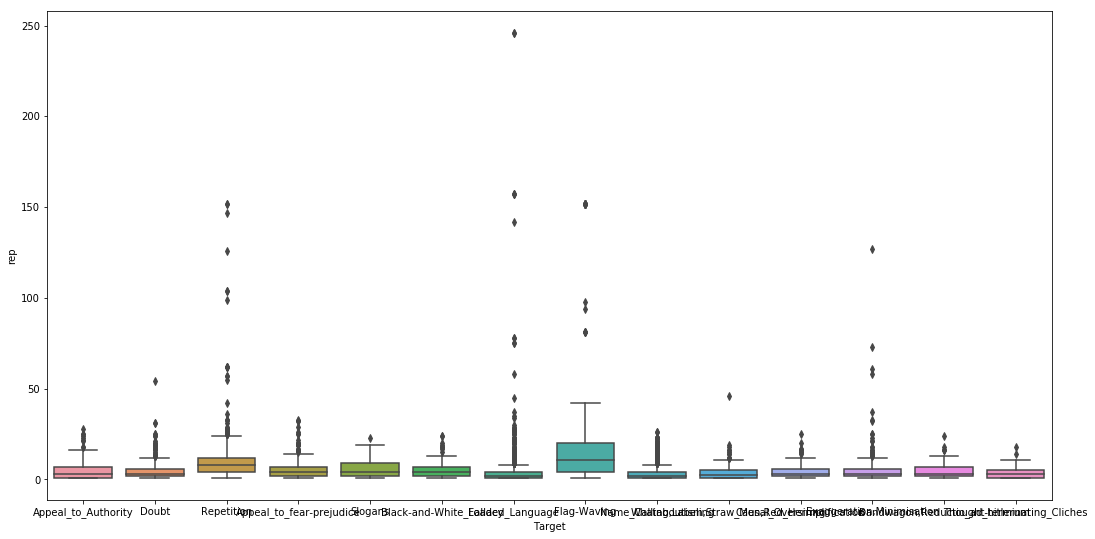

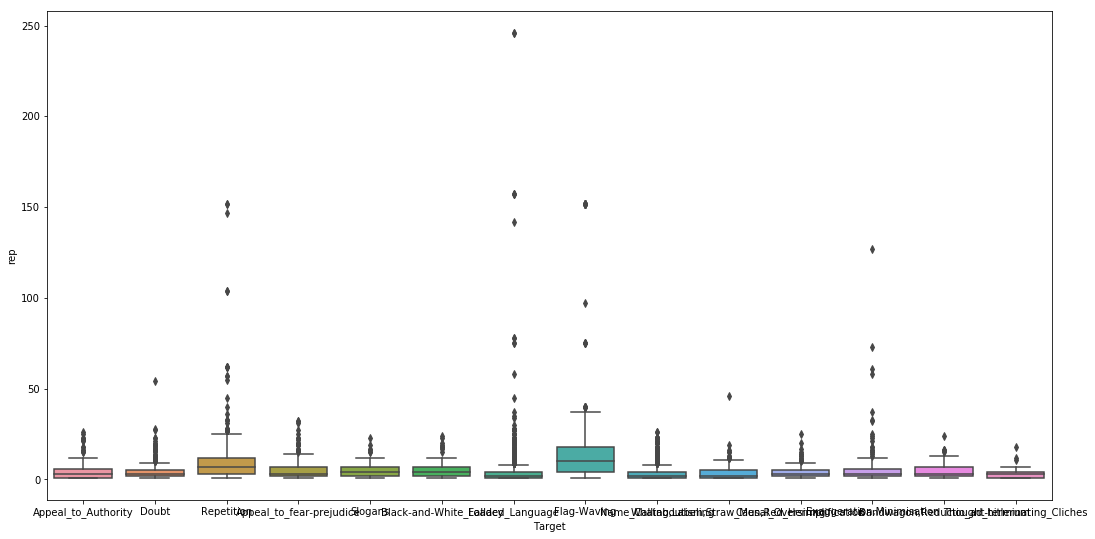

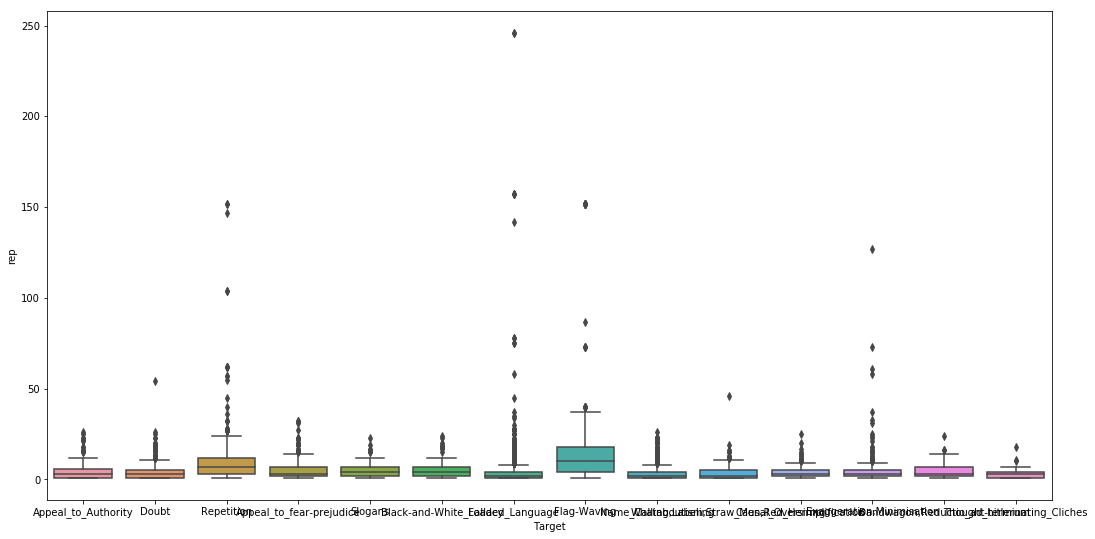

In [57]:
for thresh in range(75,100,5):
    train['rep']=(fuzz.values>thresh).sum(axis=1)
    train.groupby('Target')['rep'].describe()
    plt.figure(figsize=(18,9))
    sns.boxplot(x='Target',y='rep',data=train[train['rep']>0])

In [14]:
fuzzy_values=fuzz.values
fuzzy_values.sort(axis=1)

In [18]:
fuzzy_values

array([[  3,   3,   3, ..., 100, 100, 100],
       [  3,   3,   3, ..., 100, 100, 100],
       [  0,   0,   0, ...,  67, 100, 100],
       ...,
       [  6,   6,   7, ...,  52,  52, 100],
       [  6,   6,   6, ...,  64, 100, 100],
       [  0,   0,   0, ..., 100, 100, 100]])

In [88]:
lev_values=lev.values
lev_values.sort(axis=1)

In [89]:
lev

,0,1,2,3,4,5,6,7,8,9,...,6119,6120,6121,6122,6123,6124,6125,6126,6127,6128
0,0,0,0,0,0,0,0,0,0,0,...,48,48,48,49,49,49,49,52,58,100
1,0,0,0,0,0,0,0,0,0,0,...,47,47,47,47,47,47,48,48,55,100
2,0,0,0,0,0,0,0,0,0,0,...,57,58,58,62,62,66,66,66,66,100
3,0,0,0,0,0,0,0,0,0,0,...,51,51,52,53,56,58,61,63,64,100
4,0,0,0,0,0,0,0,0,0,0,...,47,48,48,48,48,48,48,48,48,100
5,0,0,0,0,0,0,0,0,0,0,...,52,52,53,53,53,53,54,55,57,100
6,0,0,0,0,0,0,0,0,0,0,...,50,50,50,50,50,52,53,55,58,100
7,0,0,0,0,0,0,0,0,0,0,...,47,48,48,48,48,49,50,53,65,100
8,0,0,0,0,0,0,0,5,5,5,...,54,54,54,54,55,59,60,60,93,100
9,0,0,0,0,0,0,0,0,0,0,...,48,48,48,48,48,49,50,51,52,100


In [186]:
pca_f=PCA(n_components=100)
pca_l=PCA(n_components=100)
pca_r=PCA(n_components=100)
pca_fuzzy=pca_f.fit_transform(fuzzy_values)
pca_lev=pca_l.fit_transform(lev_values)
pca_result=pca_r.fit_transform(np.concatenate([fuzzy_values,lev_values],axis=1))

In [187]:
print(sum(pca_f.explained_variance_ratio_))
print(sum(pca_l.explained_variance_ratio_))
print(sum(pca_r.explained_variance_ratio_))

0.9979270927968062
0.9983077034692562
0.9969464028455024


In [188]:
from sklearn.manifold import TSNE
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 8})
RS = 1234
import matplotlib.patheffects as PathEffects

In [189]:
import time
time_start = time.time()

fashion_pca_tsne_r = TSNE(random_state=RS).fit_transform(pca_result)
fashion_pca_tsne_l = TSNE(random_state=RS).fit_transform(pca_lev)
fashion_pca_tsne_f = TSNE(random_state=RS).fit_transform(pca_fuzzy)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 111.75837182998657 seconds


In [234]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
y=label_encoder.fit_transform(train.Target)

In [191]:
# Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors,figsize=(8,8)):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=figsize)
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=20)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 720x720 with 1 Axes>,
 [Text(-15.9624,-35.4128,'0'),
  Text(-18.6968,-24.4472,'1'),
  Text(-22.1754,-17.3725,'2'),
  Text(-24.6387,-27.6583,'3'),
  Text(-19.7373,-43.2029,'4'),
  Text(-16.2562,-33.7039,'5'),
  Text(-22.968,16.0164,'6'),
  Text(-19.4222,-7.80443,'7'),
  Text(28.5666,17.5206,'8'),
  Text(3.70948,26.2422,'9'),
  Text(31.267,-9.21491,'10'),
  Text(1.41478,23.7501,'11'),
  Text(-17.8039,26.7228,'12'),
  Text(-19.4358,-29.3475,'13')])

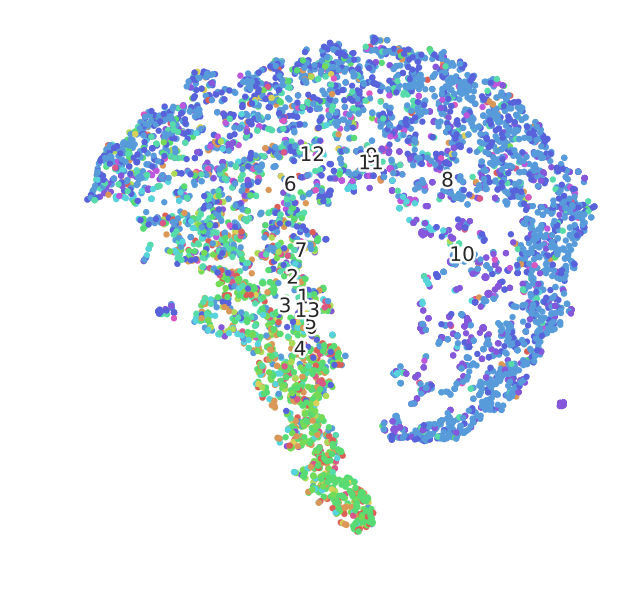

In [271]:
fashion_scatter(fashion_pca_tsne_f, y,figsize=(10,10))

(<Figure size 720x720 with 1 Axes>,
 [Text(-38.0437,-22.8603,'0'),
  Text(-37.6226,-20.1225,'1'),
  Text(-40.023,-15.3535,'2'),
  Text(-42.9112,-17.1062,'3'),
  Text(-44.602,-29.704,'4'),
  Text(-38.1289,-20.0078,'5'),
  Text(-35.6471,21.0428,'6'),
  Text(-17.777,0.40778,'7'),
  Text(15.9331,9.48681,'8'),
  Text(10.1414,16.4372,'9'),
  Text(44.6691,-4.9622,'10'),
  Text(8.50945,13.0262,'11'),
  Text(-9.38239,19.4269,'12'),
  Text(-43.7154,-24.4749,'13')])

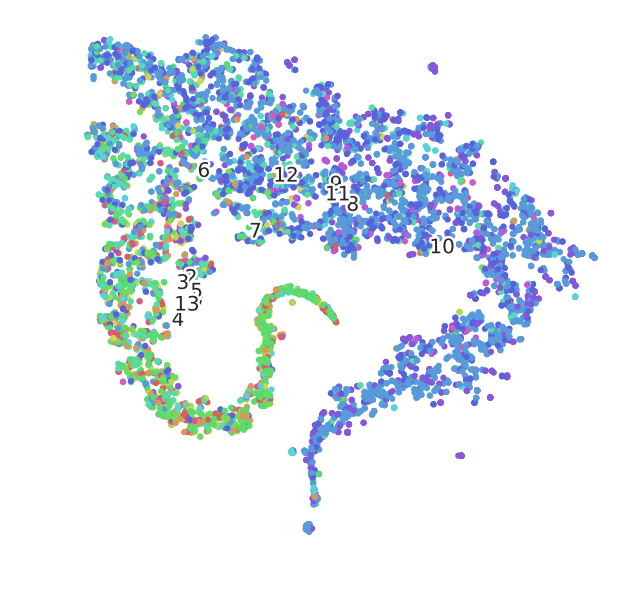

In [272]:
fashion_scatter(fashion_pca_tsne_l, y,figsize=(10,10))

(<Figure size 720x720 with 1 Axes>,
 [Text(-26.5354,-36.1292,'0'),
  Text(-28.5644,-23.9048,'1'),
  Text(-28.4971,-21.6052,'2'),
  Text(-32.462,-28.3562,'3'),
  Text(-30.4827,-47.7378,'4'),
  Text(-27.6784,-37.8648,'5'),
  Text(-29.6768,17.7319,'6'),
  Text(-22.767,-10.9354,'7'),
  Text(18.6026,16.6959,'8'),
  Text(3.6267,23.1772,'9'),
  Text(38.2694,-11.0687,'10'),
  Text(-0.55268,22.6869,'11'),
  Text(-14.5585,20.7017,'12'),
  Text(-30.727,-32.4824,'13')])

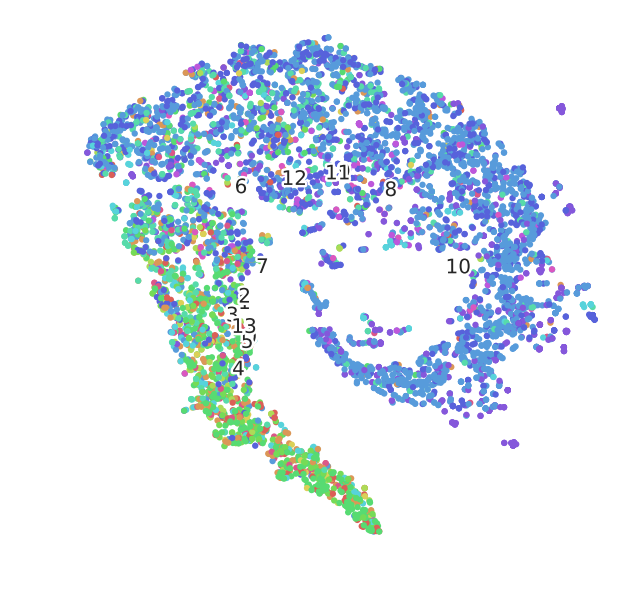

In [273]:
fashion_scatter(fashion_pca_tsne_r, y,figsize=(10,10))

In [206]:
for a,b in enumerate(label_encoder.inverse_transform([i for i in range(14)])):
    print(a,b)

0 Appeal_to_Authority
1 Appeal_to_fear-prejudice
2 Bandwagon,Reductio_ad_hitlerum
3 Black-and-White_Fallacy
4 Causal_Oversimplification
5 Doubt
6 Exaggeration,Minimisation
7 Flag-Waving
8 Loaded_Language
9 Name_Calling,Labeling
10 Repetition
11 Slogans
12 Thought-terminating_Cliches
13 Whataboutism,Straw_Men,Red_Herring


In [263]:
y_new=y.copy()
d={
    0 : 0,
    1 : 1,
    2 : 0,
    3 : 0,
    4 : 0,
    5 : 0,
    6 : 3,
    7 : 2,
    8 : 4,
    9 : 0,
    10 : 5,
    11 : 0,
    12 : 0,
    13 : 0
}
for k, v in d.items():
    y_new[y_new==k] = v

TypeError: any() takes exactly one argument (2 given)